In [1]:
import scanpy as sc
import scvi
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Preprocessing

Import Data

In [3]:
rawPath = os.path.join(os.path.dirname(os.getcwd()), "Datasets", "DUSP1", "A1-2_sc_Bulk_GSE141834", 'GSE141834_scRNAseq_rawCounts.txt')
adata = sc.read_text(rawPath).T


Quality Control

In [4]:
sc.pp.filter_genes(adata, min_cells = 10)
sc.pp.filter_cells(adata, min_genes = 100)

In [5]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

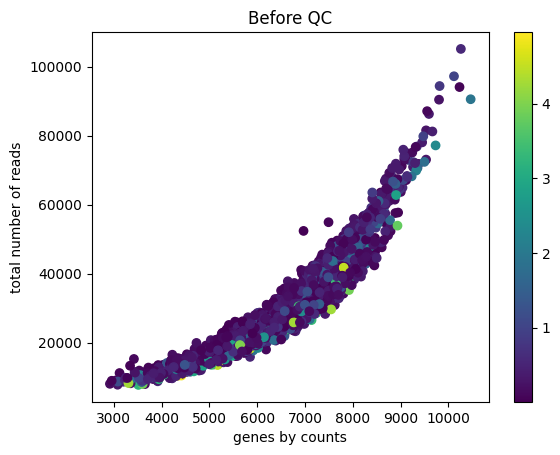

In [6]:
plt.scatter(adata.obs['n_genes_by_counts'], adata.obs['total_counts'], c=adata.obs['pct_counts_mt'])
plt.xlabel('genes by counts')
plt.ylabel('total number of reads')
plt.title("Before QC")
plt.colorbar()
plt.show()

In [7]:
adata.layers['counts'] = adata.X

Normalization

In [8]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

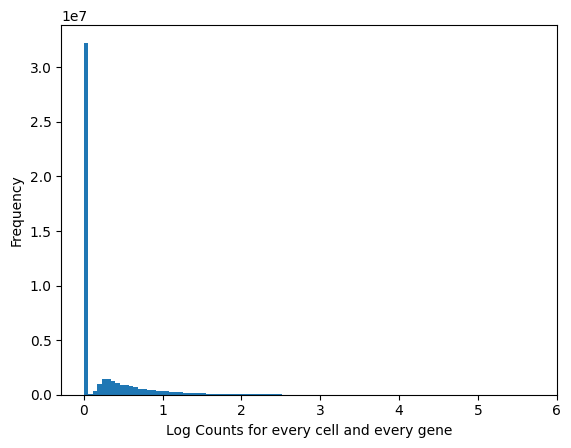

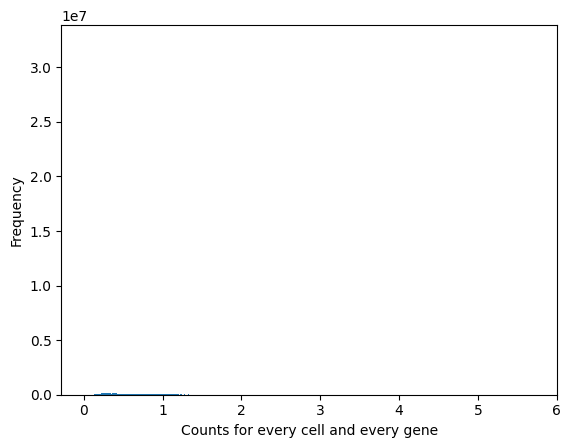

array([4949.431 , 3959.8042, 3647.6094, ..., 4448.373 , 4188.9893,
       4756.816 ], dtype=float32)

In [10]:
plt.hist(adata.X.flatten(), bins=100)
plt.xlabel('Log Counts for every cell and every gene')
plt.ylabel('Frequency')
plt.show()
plt.hist(adata.layers['counts'].flatten(), bins=1000)
plt.xlabel('Counts for every cell and every gene')
plt.ylabel('Frequency')
'''plt.xlim(10, 200)
plt.ylim(0, 10000)'''
plt.show()

adata.layers['counts'].sum(axis = 1)

In [11]:
adata.obs['Timepoint'] = [x.split('.')[1] for x in adata.obs_names]
adata.obs['Treatment'] = [x.split('.')[0] for x in adata.obs_names]

adata.obs['Timepoint'] = adata.obs['Timepoint']
adata.obs['Treatment'] = adata.obs['Treatment']

Check var names

In [12]:
lsChecks = [
    'day', 'DUSP1', 'hashtag', 'timepoint', 'treatment', 'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day',
    'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day', 'treatment_timepoint', 'treatment_timepoint_day', 'hash',
    'tag' 

]

new_tags = ['experiment_id', 'sample_id', 'batch', 'cell_type', 
            'condition', 'replicate', 'protocol', 'operator', 'date', 
            'location', 'species', 'strain', 'sex', 'age', 'developmental_stage', 
            'tissue', 'organ', 'cell_line', 'disease_state', 'platform', 'sequencing_depth', 
            'read_length', 'library_type', 'experiment_type', 'analysis_software', 'sample', 'type', 'name', 'id', 'group',
            'experiment', 'cell', adata.var_names[483]]

lsChecks.extend(new_tags)

new_tags = ['genotype', 'phenotype', 'molecule', 'barcode', 'cell_cycle', 'population', 
            'cluster', 'subpopulation', 'marker', 'antibody', 'probe', 'primer', 'temperature', 
            'humidity', 'pressure', 'light_cycle', 'food_source', 'lifecycle_stage', 'growth_conditions', 
            'experiment_conditions', 'lab', 'researcher', 'project', 'publication', 'cycle', 'dex', adata.var_names[1849], 'GH', 'dusp']


lsChecks.extend(new_tags)
print(len(lsChecks))
for i in lsChecks:
    for name in adata.var_names:
        if i.lower() in name.lower():
            print(f'{i} is in the var_names, {name}')




79
DUSP1 is in the var_names, DUSP13
DUSP1 is in the var_names, DUSP1
DUSP1 is in the var_names, DUSP18
DUSP1 is in the var_names, DUSP11
DUSP1 is in the var_names, DUSP12
DUSP1 is in the var_names, DUSP14
DUSP1 is in the var_names, DUSP16
DUSP1 is in the var_names, DUSP19
DUSP1 is in the var_names, DUSP10
DUSP1 is in the var_names, DUSP15
tag is in the var_names, STAG3L3
tag is in the var_names, STAG1
tag is in the var_names, TAGLN2
tag is in the var_names, STAG3L5P
tag is in the var_names, STAG3L5P-PVRIG2P-PILRB
tag is in the var_names, STAG2
tag is in the var_names, CTAGE5
tag is in the var_names, STAG3
tag is in the var_names, STAG3L4
tag is in the var_names, TAGLN
tag is in the var_names, STAG3L2
age is in the var_names, MAGEH1
age is in the var_names, XAGE1A
age is in the var_names, LAGE3
age is in the var_names, MAGEA1
age is in the var_names, LAGE3P1
age is in the var_names, GAGE1
age is in the var_names, BAGE2
age is in the var_names, MAGEA12
age is in the var_names, XAGE2
age

Select highly variable genes

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


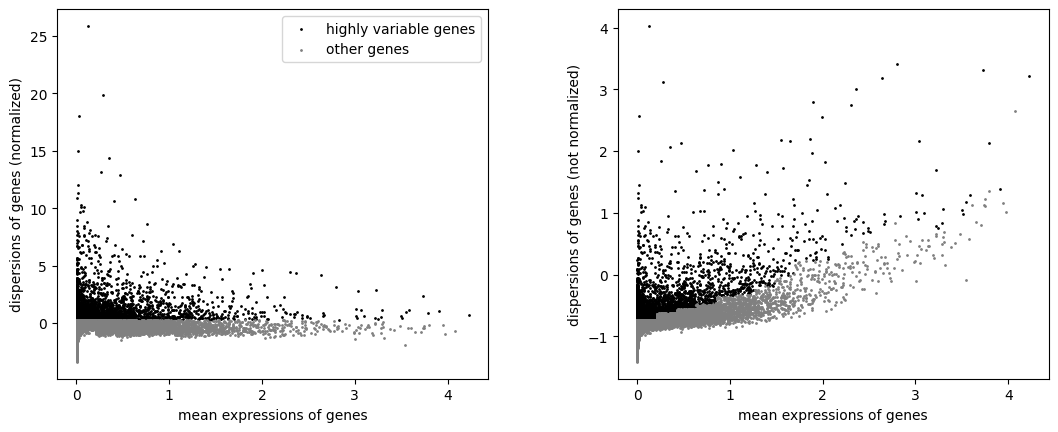

In [13]:
sc.pp.highly_variable_genes(adata, n_top_genes = 5000)
sc.pl.highly_variable_genes(adata)

In [14]:
adata = adata[:, adata.var.highly_variable]

In [15]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
# IDK if this step is necessary with scVI

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Lower Dimensional Representation

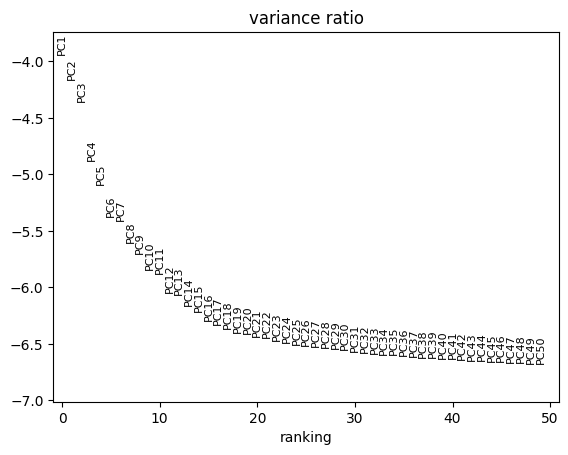

In [16]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

Pre-scVI latent space

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

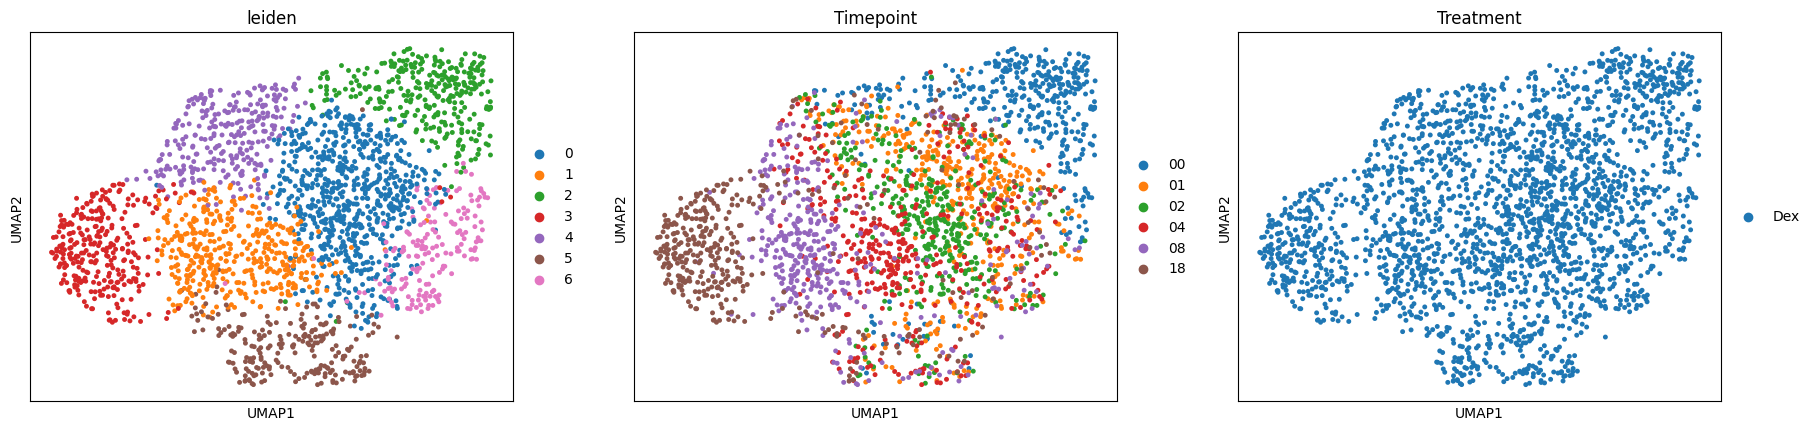

In [18]:
sc.pp.neighbors(adata, n_pcs = 30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden', 'Timepoint', 'Treatment'])

# scVI Base

In [19]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])
model = scvi.model.SCVI(adata)
model.train()

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that

Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%|          | 1/400 [00:00<04:38,  1.43it/s, v_num=1, train_loss_step=2.87e+3, train_loss_epoch=3.23e+3]

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████| 400/400 [01:11<00:00,  5.98it/s, v_num=1, train_loss_step=1.6e+3, train_loss_epoch=1.62e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:11<00:00,  5.58it/s, v_num=1, train_loss_step=1.6e+3, train_loss_epoch=1.62e+3]


scVI latent space

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

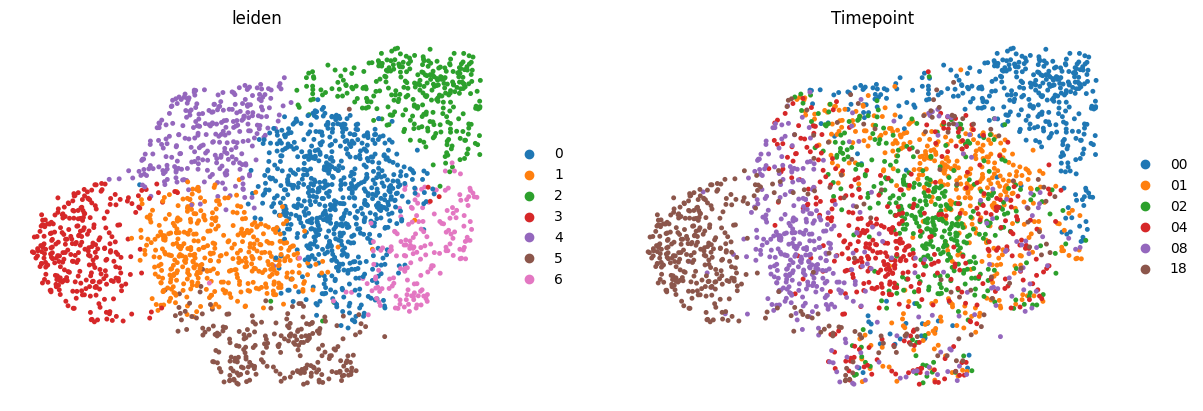

In [20]:
adata.obsm['X_scVI'] = model.get_latent_representation()
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = ['leiden', 'Timepoint'], frameon = False)

# Differential expression

Rest vs Timepoint

In [21]:
markers_scvi = model.differential_expression(groupby = 'Timepoint')
markers_scvi

DE...: 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9804,0.0196,3.912431,1.315851e-06,0.000078,0.0,0.25,-4.581644,-4.518083,2.740292,...,0.000000,0.063098,0.0000,0.1495,0.000000,0.578051,True,00 vs Rest,00,Rest
IP6K3,0.9786,0.0214,3.822732,4.238984e-07,0.000029,0.0,0.25,-4.547055,-4.458211,2.894023,...,0.000000,0.024162,0.0000,0.0685,0.000000,0.214588,True,00 vs Rest,00,Rest
AC010980.2,0.9752,0.0248,3.671799,7.085868e-08,0.000003,0.0,0.25,-4.002410,-3.975543,2.608765,...,0.000000,0.004264,0.0000,0.0130,0.000000,0.037309,True,00 vs Rest,00,Rest
F3,0.9742,0.0258,3.631242,6.291901e-06,0.000054,0.0,0.25,-2.663620,-2.621857,1.497100,...,0.009535,0.071599,0.0300,0.1730,0.095439,0.661067,True,00 vs Rest,00,Rest
STEAP4,0.9726,0.0274,3.569430,1.237491e-07,0.000004,0.0,0.25,-4.004539,-3.981573,2.566977,...,0.000000,0.006831,0.0000,0.0215,0.000000,0.063179,True,00 vs Rest,00,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ODC1,0.2332,0.7668,-1.190330,5.519687e-04,0.000529,0.0,0.25,0.060691,0.061923,0.206026,...,0.640661,0.534832,0.9025,0.8240,6.051586,5.159606,False,18 vs Rest,18,Rest
TM9SF3,0.2034,0.7966,-1.365178,1.272910e-03,0.001256,0.0,0.25,0.020055,0.018958,0.196076,...,1.428848,1.379883,0.9950,0.9870,13.349762,13.249618,False,18 vs Rest,18,Rest
PARP1,0.1964,0.8036,-1.408948,1.223184e-03,0.001196,0.0,0.25,0.034834,0.036978,0.183743,...,1.183048,1.129587,0.9875,0.9780,11.059334,10.843569,False,18 vs Rest,18,Rest
DHCR24,0.1826,0.8174,-1.498831,1.636194e-03,0.001548,0.0,0.25,0.079955,0.083182,0.170044,...,1.765122,1.496541,0.9950,0.9915,16.518755,14.394309,False,18 vs Rest,18,Rest


DE for tp vs tp

In [22]:
t2t = []
for t1 in adata.obs.Timepoint.cat.categories:
    for t2 in adata.obs.Timepoint.cat.categories:
        if t1 != t2:
            markers_scvi = model.differential_expression(groupby = 'Timepoint', group1 = t1, group2 = t2)
            t2t.append(markers_scvi)

DE...: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


In [23]:
df = pd.concat(t2t)
df.to_csv('differential_expression.csv')